# Statistics Figure Panels

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../')
from score.density_estimate import DensityEstimate
from score.statistics import Statistics
from benchmark import families
import os
from scipy.stats import sem
from glob import glob
%matplotlib inline

/Users/jpaggi/schrodinger.ve/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


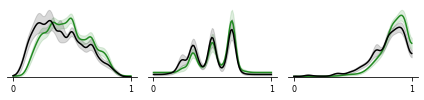

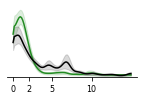

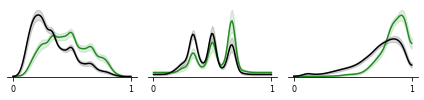

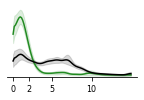

In [2]:

def plot(basename):
    f, ax = plt.subplots(1, 3, figsize = (6, 1.5))
    for i, interaction in enumerate(['hbond', 'sb', 'contact']):
        nat = np.vstack([de.fx for de in stats['native'][interaction]])
        low = nat.mean(axis=0) - sem(nat, axis=0)
        high = nat.mean(axis=0) + sem(nat, axis=0)
        ax[i].fill_between(np.linspace(0, 1, 100), low, high, color='forestgreen', alpha=0.15)
        ax[i].plot(np.linspace(0, 1, 100), nat.mean(axis=0), color='forestgreen')

        ref = np.vstack([de.fx for de in stats['reference'][interaction]])
        low = ref.mean(axis=0) - sem(ref, axis=0)
        high = ref.mean(axis=0) + sem(ref, axis=0)
        ax[i].fill_between(np.linspace(0, 1, 100), low, high, color='k', alpha=0.15)
        ax[i].plot(np.linspace(0, 1, 100), ref.mean(axis=0), color='k')

        ax[i].spines['left'].set_visible(False)
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['top'].set_visible(False)

        ax[i].set_xticks([0, 1])
        ax[i].set_xticklabels([0, 1], fontsize = 8)
        ax[i].set_yticks([])
        ax[i].set_ylim(0)
    plt.tight_layout()
    plt.savefig('../../pymol/figures/fig2_panels/{}-interaction_similarities.pdf'.format(basename))
    plt.show()

    interaction = 'mcss'

    f, ax = plt.subplots(1, 1, figsize = (2*1.05, 1.5))
    nat = [de.fx for de in stats['native'][interaction]]
    samples = []
    for _ in range(10000):
        sample = [nat[np.random.randint(len(nat))] for _ in range(len(nat))]
        samples += [np.vstack(sample).mean(axis = 0)]
    samples = np.vstack(samples)

    low, high = [], []
    for j in range(samples.shape[1]):
        low += [np.percentile(samples[:, j], 8.5)]
        high += [np.percentile(samples[:, j], 91.5)]
    ax.fill_between(np.linspace(0, 15, 100), low, high, color='forestgreen', alpha=0.15)
    ax.plot(np.linspace(0, 15, 100), np.vstack(nat).mean(axis=0), color='forestgreen')

    ref = np.vstack([de.fx for de in stats['reference'][interaction]])
    samples = []
    for _ in range(10000):
        sample = [ref[np.random.randint(len(ref))] for _ in range(len(ref))]
        samples += [np.vstack(sample).mean(axis = 0)]
    samples = np.vstack(samples)

    low, high = [], []
    for j in range(samples.shape[1]):
        low += [np.percentile(samples[:, j], 8.5)]
        high += [np.percentile(samples[:, j], 91.5)]
    ax.fill_between(np.linspace(0, 15, 100), low, high, color='k', alpha=0.15)
    ax.plot(np.linspace(0, 15, 100), np.vstack(ref).mean(axis=0), color='k')

    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xticks([0, 2, 5, 10])
    ax.set_xticklabels([0, 2, 5, 10], fontsize = 8)
    ax.set_yticks([])
    ax.set_ylim(0)

    plt.tight_layout()
    plt.savefig('../../pymol/figures/fig2_panels/{}-mcss_similarities.pdf'.format(basename))
    plt.show()
    
stats = Statistics.read_proteins('/Users/jpaggi/sherlock/oak/users/jpaggi/stats/tanimoto_exclude-True-False-100-100-1-0.03/{}-{}-{}.de')
plot('top1')
stats = Statistics.read_proteins('/Users/jpaggi/sherlock/oak/users/jpaggi/stats/tanimoto_exclude-True-False-100-100-100-0.03/{}-{}-{}.de')
plot('top100')